In [2]:
import keras

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
import glob

In [4]:
schema_train_3 = {
    'IsBeta': np.int8,
    'RtpStateBitfield': np.int8,
    'IsSxsPassiveMode': np.int8,
    'DefaultBrowsersIdentifier': np.int16,
    'AVProductStatesIdentifier': np.int32,
    'AVProductsInstalled': np.int8,
    'AVProductsEnabled': np.int8,
    'HasTpm': np.int8,
    'CountryIdentifier': np.int16,
    'CityIdentifier': np.int32,
    'OrganizationIdentifier': np.int8,
    'GeoNameIdentifier': np.int16,
    'LocaleEnglishNameIdentifier': np.int16,
    'OsBuild': np.int16,
    'OsSuite': np.int16,
    'IsProtected': np.int8,
    'AutoSampleOptIn': np.int8,
    'SMode': np.int8,
    'IeVerIdentifier': np.int16,
    'Firewall': np.int8,
    'UacLuaenable': np.int32,
    'Census_OEMNameIdentifier': np.int16,
    'Census_OEMModelIdentifier': np.int32,
    'Census_ProcessorCoreCount': np.int16,
    'Census_ProcessorManufacturerIdentifier': np.int8,
    'Census_ProcessorModelIdentifier': np.int16,
    'Census_PrimaryDiskTotalCapacity': np.int32,
    'Census_SystemVolumeTotalCapacity': np.int32,
    'Census_HasOpticalDiskDrive': np.int8,
    'Census_TotalPhysicalRAM': np.int32,
    'Census_InternalPrimaryDiagonalDisplaySizeInInches': np.float16,
    'Census_InternalPrimaryDisplayResolutionHorizontal': np.float16,
    'Census_InternalPrimaryDisplayResolutionVertical': np.int16,
    'Census_InternalBatteryNumberOfCharges': np.int32,
    'Census_OSBuildNumber': np.int16,
    'Census_OSBuildRevision': np.int32,
    'Census_OSInstallLanguageIdentifier': np.int8,
    'Census_OSUILocaleIdentifier': np.int16,
    'Census_IsPortableOperatingSystem': np.int8,
    'Census_IsFlightingInternal': np.int8,
    'Census_IsFlightsDisabled': np.int8,
    'Census_ThresholdOptIn': np.int8,
    'Census_FirmwareManufacturerIdentifier': np.int16,
    'Census_FirmwareVersionIdentifier': np.int32,
    'Census_IsSecureBootEnabled': np.int8,
    'Census_IsWIMBootEnabled': np.int8,
    'Census_IsVirtualDevice': np.int8,
    'Census_IsTouchEnabled': np.int8,
    'Census_IsPenCapable': np.int8,
    'Census_IsAlwaysOnAlwaysConnectedCapable': np.int8,
    'Wdft_IsGamer': np.int8,
    'Wdft_RegionIdentifier': np.int8,
    'HasDetections': np.int8,
    'Census_InternalBatteryType_informed': np.int8,
    'ProductName_index': np.int8,
    'Platform_index': np.int8,
    'Processor_index': np.int8,
    'OsPlatformSubRelease_index': np.int8,
    'OsBuildLab_index': np.int16,
    'SkuEdition_index': np.int8,
    'PuaMode_index': np.int8,
    'SmartScreen_index': np.int8,
    'Census_MDC2FormFactor_index': np.int8,
    'Census_DeviceFamily_index': np.int8,
    'Census_ProcessorClass_index': np.int8,
    'Census_PrimaryDiskTypeName_index': np.int8,
    'Census_ChassisTypeName_index': np.int8,
    'Census_PowerPlatformRoleName_index': np.int8,
    'Census_InternalBatteryType_index': np.int8,
    'Census_OSArchitecture_index': np.int8,
    'Census_OSBranch_index': np.int8,
    'Census_OSEdition_index': np.int8,
    'Census_OSSkuName_index': np.int8,
    'Census_OSInstallTypeName_index': np.int8,
    'Census_OSWUAutoUpdateOptionsName_index': np.int8,
    'Census_GenuineStateName_index': np.int8,
    'Census_ActivationChannel_index': np.int8,
    'Census_FlightRing_index': np.int8,
    'Census_OSVersion_index': np.int16,
    'EngineVersion_index': np.int8,
    'AppVersion_index': np.int8,
    'AvSigVersion_index': np.int16,
    'OsVer_index': np.int8,
    'Census_OSVersion_0_index': np.int8,
    'Census_OSVersion_1_index': np.int16,
    'EngineVersion_0_index': np.int8,
    'EngineVersion_1_index': np.int8,
    'AppVersion_0_index': np.int8,
    'AppVersion_1_index': np.int8,
    'AvSigVersion_0_index': np.int8,
    'AvSigVersion_1_index': np.int16,
    'OsVer_0_index': np.int8,
    'OsVer_1_index': np.int8,
    'OsBuildLab_diff': np.int8,
    'AvSigVersion_diff': np.int16,
    'OSVersion_diff': np.int8,
    'OSBuild_fulldiff': np.int8,
    'AvSigVersion_fulldiff': np.int8,
    'OsBuildLab_difftotal': np.int16,
    'DateAvSigVersion_difftotal': np.int16,
    'DateOSVersion_difftotal': np.int16,
    'DateAvSigVersion_fulldifftotal': np.int8,
    'OsBuildLab_fulldifftotal': np.int8,
    'DateAvSigVersion_ratio': np.float16,
    'OsBuildLab_ratio': np.float16,
    'OSVersion_ratio': np.float16,
    'DateAvSigVersion_fullratio': np.float16,
    'OsBuildLab_fullratio': np.float16,
    'OsBuildLab_dayOfWeek': np.int8,
    'AvSigVersion_dayOfWeek': np.int8,
    'prediction_2': np.int8,
    'prediction_4': np.int8,
    'prediction_8': np.int8,
    'prediction_16': np.int8,
    'prediction_32': np.int8,
    'prediction_64': np.int8,
    'count(DISTINCT AvSigVersion_Name)': np.int16,
    'count(DISTINCT AvSigVersion_Type)': np.int8,
    'count(DISTINCT AvSigVersion_AlertLevel)': np.int8
}

In [5]:

print('Cargando datos del TRAIN')
path = '../../data/train_final_3'
allFiles = glob.glob(path + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    df = (df.fillna(-1)).astype(schema_train_3)
    list_.append(df)

train = pd.concat(list_, axis = 0, ignore_index = True)

sel_cols = [c for c in train.columns if c not in ['MachineIdentifier',
                                                      'HasDetections',
                                                      'Census_DeviceFamily_Windows.Server',
                                                      'Census_DeviceFamily_Windows.Desktop'
                                                     ]]
print('Datos del TRAIN cargados')



Cargando datos del TRAIN
Datos del TRAIN cargados


In [6]:
X = train.loc[:, sel_cols]
y = train.loc[:,'HasDetections']


# Test de seleccion de variables

In [32]:
train.columns

Index(['MachineIdentifier', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier',
       ...
       'AvSigVersion_dayOfWeek', 'prediction_2', 'prediction_4',
       'prediction_8', 'prediction_16', 'prediction_32', 'prediction_64',
       'count(DISTINCT AvSigVersion_Name)',
       'count(DISTINCT AvSigVersion_Type)',
       'count(DISTINCT AvSigVersion_AlertLevel)'],
      dtype='object', length=120)

In [41]:
import random

sel_cols = set(train.columns) - set(['MachineIdentifier','HasDetections','Census_DeviceFamily_Windows.Server','Census_DeviceFamily_Windows.Desktop'])
sel_cols_test = []
while len(sel_cols_test) < 25:
    sel_cols_test.append(random.choice(train.columns))
sel_cols_test

['Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_ProcessorManufacturerIdentifier',
 'prediction_4',
 'Census_DeviceFamily_index',
 'IeVerIdentifier',
 'DateAvSigVersion_fullratio',
 'Census_GenuineStateName_index',
 'AvSigVersion_0_index',
 'AvSigVersion_1_index',
 'Census_OSVersion_0_index',
 'Wdft_RegionIdentifier',
 'Wdft_IsGamer',
 'Census_OSArchitecture_index',
 'SMode',
 'Census_IsVirtualDevice',
 'DefaultBrowsersIdentifier',
 'OSVersion_ratio',
 'Census_OEMNameIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'OsBuildLab_dayOfWeek',
 'GeoNameIdentifier',
 'HasTpm',
 'OsBuildLab_ratio',
 'OsBuildLab_difftotal',
 'prediction_8']

In [21]:
numericas = ['RtpStateBitfield','DefaultBrowsersIdentifier' ,'AVProductStatesIdentifier' ,'AVProductsInstalled' ,'AVProductsEnabled' ,'CityIdentifier','OrganizationIdentifier','GeoNameIdentifier','IsProtected' ,'SMode' ,'IeVerIdentifier','Firewall','UacLuaenable','Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier','Census_OSInstallLanguageIdentifier','Census_IsFlightingInternal','Census_IsFlightsDisabled','Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier','Census_IsWIMBootEnabled','Census_IsVirtualDevice','Census_IsAlwaysOnAlwaysConnectedCapable','Wdft_IsGamer','Wdft_RegionIdentifier','Census_ProcessorCoreCount','Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM','Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical','Census_InternalBatteryNumberOfCharges','Census_ThresholdOptIn']

In [22]:
X = train.loc[:, numericas]
y = train.loc[:,'HasDetections']

# train y test

In [7]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [24]:
print("X_train :"+str(X_train.shape))

print("X_test :"+str(X_test.shape))


print("y_train :"+str(y_train.shape))

print("y_test :"+str(y_test.shape))

X_train :(7137186, 36)
X_test :(1784297, 36)
y_train :(7137186,)
y_test :(1784297,)


# Mi modelo

In [10]:


from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

In [212]:
X_train.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,AvSigVersion_dayOfWeek,prediction_2,prediction_4,prediction_8,prediction_16,prediction_32,prediction_64,count(DISTINCT AvSigVersion_Name),count(DISTINCT AvSigVersion_Type),count(DISTINCT AvSigVersion_AlertLevel)
2429107,0,7,0,0,53447,1,1,1,59,22656,...,7,0,0,0,6,11,12,-1,-1,-1
7134227,0,7,0,0,53039,2,1,1,101,142350,...,3,0,0,0,10,13,46,8,1,2
8796516,0,7,0,0,62773,1,1,1,89,12685,...,1,0,0,6,0,0,50,87,1,2
3358715,0,7,0,0,53447,1,1,1,181,48792,...,1,0,0,6,13,27,34,-1,-1,-1
2779875,0,7,0,788,53447,1,1,1,93,69625,...,6,0,0,6,11,27,38,32,2,2


In [27]:
dimension = X_train.shape[1]

In [214]:
dimension

118

In [215]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [216]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='auroc', patience=20, verbose=2,min_delta=0.01, mode='auto')

In [17]:
from keras.optimizers import SGD


In [43]:
model = Sequential()

model.add(Dense(256, input_dim=dimension, kernel_initializer='uniform', activation='relu'))
model.add(Dense(512))
model.add(Dense(128))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               9472      
_________________________________________________________________
dense_30 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 206,849
Trainable params: 206,849
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train, y_train,
          epochs=15,
          batch_size=int(X_train.shape[0]/1000),
            validation_data = (X_test,y_test))
#              callbacks=[earlyStopping])

Train on 7137186 samples, validate on 1784297 samples
Epoch 1/15
7137186/7137186 [==============================] - 164s 23us/step - loss: 7.9738 - acc: 0.4998 - val_loss: 7.9772 - val_acc: 0.4996
Epoch 2/15
7137186/7137186 [==============================] - 163s 23us/step - loss: 7.9738 - acc: 0.4998 - val_loss: 7.9772 - val_acc: 0.4996
Epoch 3/15
7137186/7137186 [==============================] - 155s 22us/step - loss: 7.9738 - acc: 0.4998 - val_loss: 7.9772 - val_acc: 0.4996
Epoch 4/15
7137186/7137186 [==============================] - 149s 21us/step - loss: 7.9738 - acc: 0.4998 - val_loss: 7.9772 - val_acc: 0.4996
Epoch 5/15
7137186/7137186 [==============================] - 158s 22us/step - loss: 7.9738 - acc: 0.4998 - val_loss: 7.9772 - val_acc: 0.4996
Epoch 6/15
7137186/7137186 [==============================] - 143s 20us/step - loss: 7.9738 - acc: 0.4998 - val_loss: 7.9772 - val_acc: 0.4996
Epoch 7/15
7137186/7137186 [==============================] - 155s 22us/step - loss: 7.9

KeyboardInterrupt: 

In [172]:
score = model.evaluate(X_test, y_test, batch_size=int(X_train.shape[0]/100),verbose=1)

1784297/1784297 [==============================] - 4s 2us/step


In [173]:
score

[0.6871217767783414, 0.5415051351181513]

In [198]:
del model

In [199]:
import gc
gc.collect()

487

In [40]:
from numpy import argmax
from numpy import array
from keras.utils import to_categorical
# define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# # invert encoding
inverted = argmax(encoded[0])
print(inverted)
model = Sequential()
model.add(Dense(15,input=data))

[1 3 2 0 3 2 2 1 0 1]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
1


TypeError: ('Keyword argument not understood:', 'input')

## Graphs

In [202]:
model.history.history.keys()

dict_keys(['val_loss', 'val_auroc', 'loss', 'auroc'])

In [57]:
import matplotlib.pyplot as plt

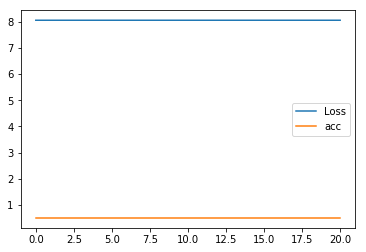

In [203]:
plt.plot(model.history.history['loss'],label="Loss")
plt.plot(model.history.history['auroc'],label="acc")
plt.legend()

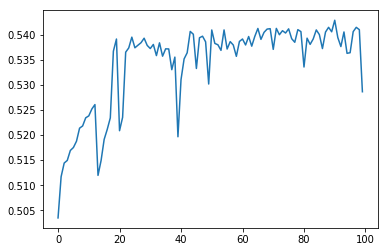

In [59]:
plt.plot(model.history.history['acc'])

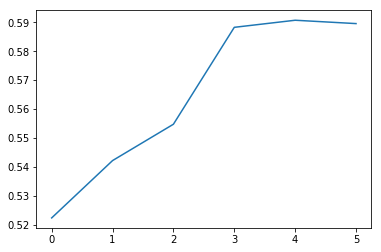

In [79]:
plt.plot(model.history.history['auroc'])

# Red neuronal Kaggle

In [91]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

# #SPLIT TRAIN AND VALIDATION SET
# X_train, X_val, Y_train, Y_val = train_test_split(
#     df_train[cols], df_train['HasDetections'], test_size = 0.5)




In [111]:
# BUILD MODEL
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01), loss="binary_crossentropy", metrics=["accuracy"])
annealer = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** x)


In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 100)               2600      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
__________

In [11]:
from keras import callbacks
from sklearn.metrics import roc_auc_score

class printAUC(callbacks.Callback):
    def __init__(self, X_train, y_train):
        super(printAUC, self).__init__()
        self.bestAUC = 0
        self.X_train = X_train
        self.y_train = y_train
        
    def on_epoch_end(self, epoch, logs={}):
        pred = self.model.predict(np.array(self.X_train))
        auc = roc_auc_score(self.y_train, pred)
        print("Train AUC: " + str(auc))
        pred = self.model.predict(self.validation_data[0])
        auc = roc_auc_score(self.validation_data[1], pred)
        print ("Validation AUC: " + str(auc))
        if (self.bestAUC < auc) :
            self.bestAUC = auc
            self.model.save("bestNet.h5", overwrite=True)
        return

In [23]:
# TRAIN MODEL
model.fit(X_train,y_train, batch_size=int(X_train.shape[0]/100), epochs = 20, callbacks=[annealer,
          printAUC(X_train, y_train)], validation_data = (X_test,y_test), verbose=1)

# model.fit(X_train,y_train, batch_size=int(X_train.shape[0]/100), epochs = 20, callbacks=[annealer,
#           printAUC(X_train, y_train)], verbose=1)

Train on 4460741 samples, validate on 4460742 samples
Epoch 1/20
4460741/4460741 [==============================] - 68s 15us/step - loss: 0.6809 - acc: 0.5682 - val_loss: 0.6843 - val_acc: 0.5397
Train AUC: 0.5956970567859148
Validation AUC: 0.5958255691362411
Epoch 2/20
4460741/4460741 [==============================] - 130s 29us/step - loss: 0.6796 - acc: 0.5713 - val_loss: 0.6826 - val_acc: 0.5458
Train AUC: 0.594784387193786
Validation AUC: 0.594925299695099
Epoch 3/20
4460741/4460741 [==============================] - 67s 15us/step - loss: 0.6795 - acc: 0.5714 - val_loss: 0.6830 - val_acc: 0.5445
Train AUC: 0.5950191573938716
Validation AUC: 0.5952047500529727
Epoch 4/20
4460741/4460741 [==============================] - 105s 23us/step - loss: 0.6790 - acc: 0.5728 - val_loss: 0.6840 - val_acc: 0.5395
Train AUC: 0.5948202387306923
Validation AUC: 0.5950327624329301
Epoch 5/20
4460741/4460741 [==============================] - 78s 18us/step - loss: 0.6786 - acc: 0.5736 - val_loss: 0

In [ ]:
model.predict_proba(X_test)

# Prediction

In [65]:
print('Cargando datos del TEST')
path = '../../data/test_final_3'
allFiles = glob.glob(path + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    df = (df.fillna(-1)).astype(schema_train_3)
    list_.append(df)


test = pd.concat(list_, axis = 0, ignore_index = True).fillna(-1)

sel_cols = [c for c in test.columns if c not in ['MachineIdentifier',
                                                 'HasDetections',
                                                 'Census_DeviceFamily_Windows.Server',
                                                 'Census_DeviceFamily_Windows.Desktop'
                                                 ]
            ]

X_test = test.loc[:, sel_cols]

Cargando datos del TEST


In [29]:
predictions = model.predict(X_test)

In [30]:
predictions

array([[0.44171727],
       [0.55441296],
       [0.43175006],
       ...,
       [0.42705053],
       [0.38649637],
       [0.46251813]], dtype=float32)

In [42]:
predf= pd.DataFrame(predictions,columns=['HasDetections'])

In [52]:
pd.concat([X_machines,predf],axis=1).to_csv('keras_model.csv', index=None)

In [192]:
X_machines = test.loc[:, 'MachineIdentifier']


df_prds = pd.DataFrame({'MachineIdentifier': X_machines, 'HasDetections': predictions})

df_prds.to_csv('keras_model.csv', index=None)

NameError: name 'predictions' is not defined

In [104]:
del predictions

### Save train in one file

In [64]:
train.to_csv("train_uniq.csv")

In [66]:
test.to_csv("test_uniq.csv")